## Problem Statement

- #### Objective:
**To develop a machine learning model that can accurately classify images of dogs and cats. The model will analyze the given image and predict whether it contains a dog or a cat.**

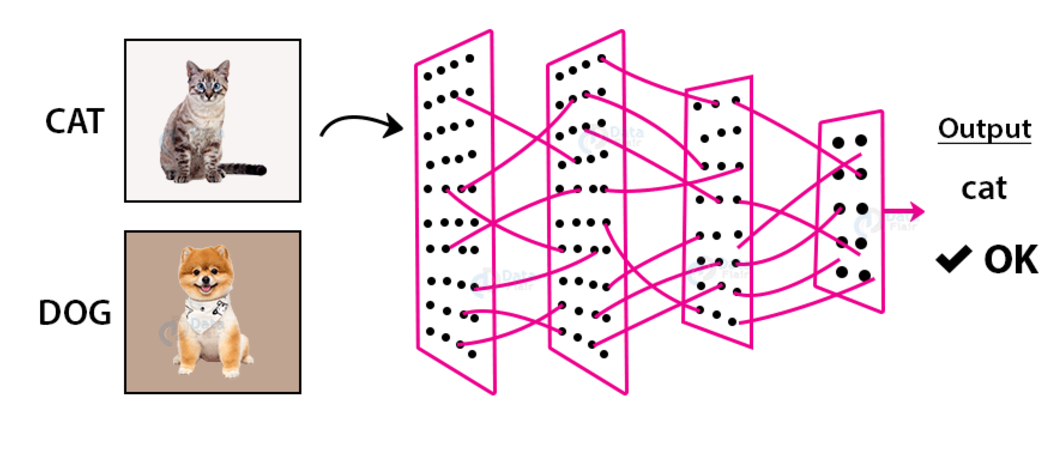

================================================================================================================

### Load Packages

In [1]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,Dense,MaxPool2D,Flatten

### Load Dataset

In [3]:
x_train=np.loadtxt(fname="input.csv",delimiter=",")
x_test=np.loadtxt(fname="input_test.csv",delimiter=",")

y_train=np.loadtxt(fname="labels.csv",delimiter=",")
y_test=np.loadtxt(fname="labels_test.csv",delimiter=",")

In [7]:
print("Shape of x_train : ", x_train.shape)  #(total num of images,(each image has (100*100 and 3 for RGB channels)
print("Shape of x_test : ", x_test.shape)
print("Shape of y_train : ", y_train.shape)  #(total num of image ,(each image has (100*100 and 3 for RGB channels)
print("Shape of y_test : ", y_test.shape)

Shape of x_train :  (2000, 30000)
Shape of x_test :  (400, 30000)
Shape of y_train :  (2000,)
Shape of y_test :  (400,)


### Reshape image data

In [10]:
x_train=x_train.reshape(len(x_train),100,100,3)
x_test=x_test.reshape(len(x_test),100,100,3)


y_train=y_train.reshape(len(y_train),1)


y_test=y_test.reshape(len(y_test),1)

In [11]:
print("Shape of x_train : ", x_train.shape)  
print("Shape of x_test : ", x_test.shape)
print("Shape of y_train : ", y_train.shape)  
print("Shape of y_test : ", y_test.shape)

Shape of x_train :  (2000, 100, 100, 3)
Shape of x_test :  (400, 100, 100, 3)
Shape of y_train :  (2000, 1)
Shape of y_test :  (400, 1)


In [15]:
x_train[1,:]   #values of pixels range between 0 to 255 

array([[[131., 128., 135.],
        [160., 157., 164.],
        [198., 192., 204.],
        ...,
        [250., 249., 247.],
        [255., 255., 253.],
        [250., 249., 245.]],

       [[140., 137., 144.],
        [127., 124., 131.],
        [120., 114., 124.],
        ...,
        [251., 253., 252.],
        [254., 255., 253.],
        [254., 255., 251.]],

       [[204., 202., 207.],
        [187., 185., 190.],
        [147., 142., 148.],
        ...,
        [249., 255., 255.],
        [238., 247., 242.],
        [232., 241., 236.]],

       ...,

       [[174., 182., 195.],
        [172., 180., 193.],
        [178., 186., 197.],
        ...,
        [ 87., 114.,  97.],
        [ 75.,  99.,  83.],
        [ 80., 105.,  86.]],

       [[166., 173., 189.],
        [164., 172., 185.],
        [172., 180., 193.],
        ...,
        [ 78., 106.,  84.],
        [ 72.,  97.,  76.],
        [ 77., 102.,  81.]],

       [[173., 180., 196.],
        [172., 179., 195.],
        [174., 1

### Rescaling of images 
 - To train model properly we need to rescale these value ie : 0 to 1

In [17]:
x_train=x_train/255.0
x_test=x_test/255.0

y_train=y_train/255.0
y_test=y_test/255.0

In [19]:
x_train[1,:]  #Now values ranging between 0 to 1

array([[[0.51372549, 0.50196078, 0.52941176],
        [0.62745098, 0.61568627, 0.64313725],
        [0.77647059, 0.75294118, 0.8       ],
        ...,
        [0.98039216, 0.97647059, 0.96862745],
        [1.        , 1.        , 0.99215686],
        [0.98039216, 0.97647059, 0.96078431]],

       [[0.54901961, 0.5372549 , 0.56470588],
        [0.49803922, 0.48627451, 0.51372549],
        [0.47058824, 0.44705882, 0.48627451],
        ...,
        [0.98431373, 0.99215686, 0.98823529],
        [0.99607843, 1.        , 0.99215686],
        [0.99607843, 1.        , 0.98431373]],

       [[0.8       , 0.79215686, 0.81176471],
        [0.73333333, 0.7254902 , 0.74509804],
        [0.57647059, 0.55686275, 0.58039216],
        ...,
        [0.97647059, 1.        , 1.        ],
        [0.93333333, 0.96862745, 0.94901961],
        [0.90980392, 0.94509804, 0.9254902 ]],

       ...,

       [[0.68235294, 0.71372549, 0.76470588],
        [0.6745098 , 0.70588235, 0.75686275],
        [0.69803922, 0

### Display Image

In [20]:
import matplotlib.pyplot as plt

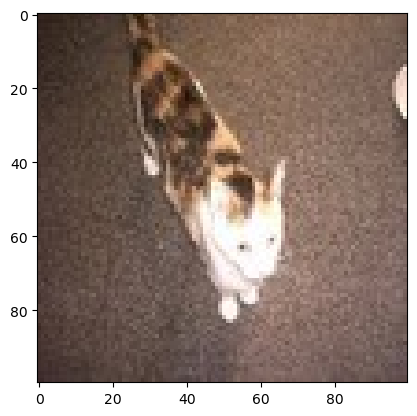

In [147]:
plt.imshow(x_train[1100])

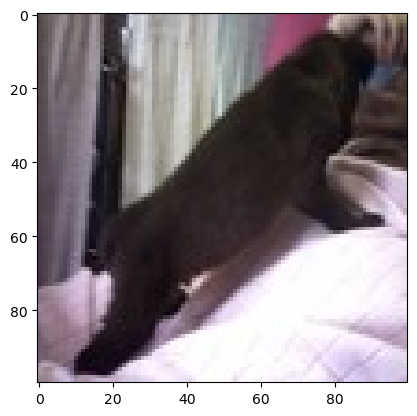

In [24]:
plt.imshow(x_train[500])

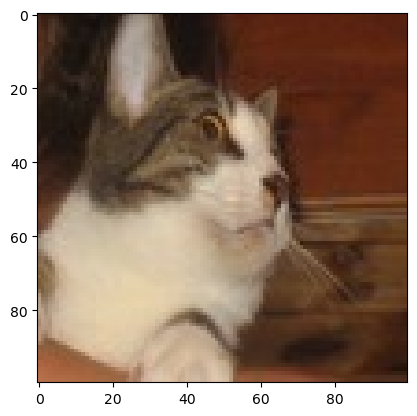

In [34]:
import random
indx=random.randint(0,len(x_train))
plt.imshow(x_train[indx])

### Model Building

In [39]:
model= Sequential()  #Layer will be stacked by sequence

model.add(Conv2D(32,(3,3),activation="relu",input_shape=(100,100,3)))

model.add(MaxPool2D((2,2)))

model.add(Conv2D(32,(3,3),activation="relu"))

model.add(Flatten())

model.add(Dense(64,activation="relu"))

model.add(Dense(1,activation="sigmoid"))


In [40]:
model.compile(loss="binary_crossentropy",optimizer="Adam", metrics=["Accuracy"])

In [43]:
model.fit(x_train,y_train,epochs=5,batch_size=64)

Epoch 1/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 7s 204ms/step - Accuracy: 0.4963 - loss: 0.0133
Epoch 2/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 6s 196ms/step - Accuracy: 0.4974 - loss: 0.0133
Epoch 3/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 6s 197ms/step - Accuracy: 0.5096 - loss: 0.0129
Epoch 4/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 6s 196ms/step - Accuracy: 0.4832 - loss: 0.0138
Epoch 5/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 6s 192ms/step - Accuracy: 0.4958 - loss: 0.0133


In [45]:
model.evaluate(x_test,y_test)

13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - Accuracy: 0.7916 - loss: 0.0067 


[0.01459802407771349, 0.5]

## Predications

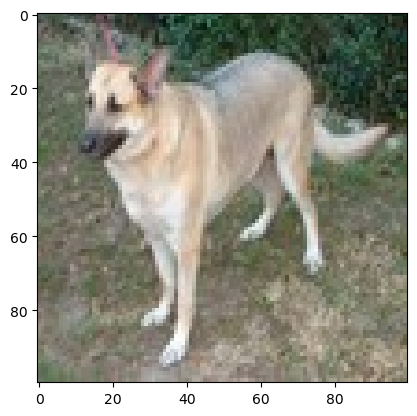

In [53]:
indx=random.randint(0,len(x_test))

plt.imshow(x_train[indx,:])
plt.show()

In [55]:
y_pred=model.predict(x_test[indx,:].reshape(1,100,100,3))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


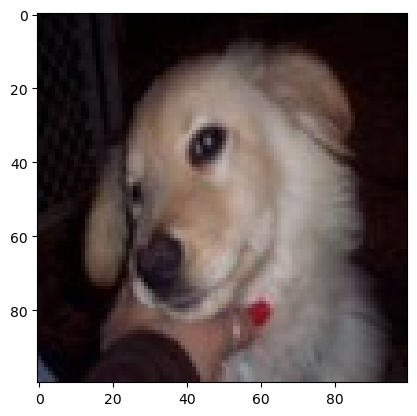

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
[[0.00033929]]
Our model says it is a :  Dog


In [168]:
indx=random.randint(0,len(x_test))

plt.imshow(x_train[indx,:])
plt.show()

y_pred=model.predict(x_test[indx,:].reshape(1,100,100,3))

print(y_pred)
y_pred = y_pred > 0.5
if (y_pred==0):
    pred = "Dog"
else:
    pred = "Cat"
print("Our model says it is a : ",pred)    

=========================================================================================================